<a href="https://colab.research.google.com/github/DaveLoay/AP_Tarea_2/blob/main/AP_T2_E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Operación de Convolución

Extiende la operación e convolución para imágenes en escala de grises (unsolo canal) a imágenes a color (multiples canales).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from sklearn.datasets import load_sample_image
from PIL import Image

#Cargando conjunto de datos
Cargar una imagen en RGB utilizando el moulo de `scikit learn`

Tipo de dato: uint8
Dimensiones: (427, 640, 3)


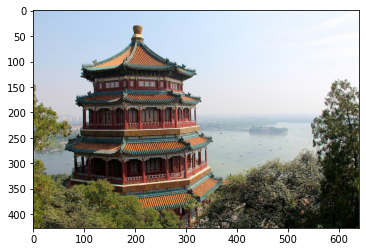

In [ ]:
china = load_sample_image('china.jpg')
plt.imshow(china)
print('Tipo de dato:' , china.dtype)
print('Dimensiones:', china.shape)


#Visualizando valores de la imagen 

In [ ]:
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

#Normalizano valores de la imagen entre 0 y 1

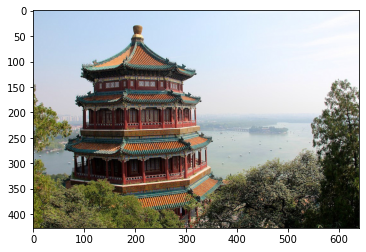

In [ ]:
china = china / china.max()
plt.imshow(china)

In [ ]:
china

array([[[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        ...,
        [0.98039216, 0.98431373, 1.        ],
        [0.98039216, 0.98431373, 1.        ],
        [0.98039216, 0.98431373, 1.        ]],

       [[0.6745098 , 0.78039216, 0.89803922],
        [0.67843137, 0.78431373, 0.90196078],
        [0.67843137, 0.78431373, 0.90196078],
        ...,
        [0.98431373, 0.98823529, 1.        ],
        [0.98431373, 0.98823529, 1.        ],
        [0.98431373, 0.98823529, 1.        ]],

       [[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        ...,
        [0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ]],

       ...,

       [[0.34509804, 0.31372549, 0.02745098],
        [0.57647059, 0.54117647, 0.27058824],
        [0.47843137, 0

# Definiendo funcion de convolución

In [ ]:
def conv2d(I, W, b, stride = 1):
  h_s = int(np.floor((I.shape[0] - W.shape[0]) / stride)) + 1
  w_s = int(np.floor((I.shape[1] - W.shape[1]) / stride)) + 1
  a = np.zeros((h_s, w_s, I.shape[-1]))
  for dim in range(I.shape[-1]):  
    for i in range(h_s):
      for j in range(w_s):
        I_m = I[i * stride:i * stride + W.shape[0], j * stride:j * stride + W.shape[1]]
        a[i, j] = (I_m * W).sum() + b
                  
  return a

#Función de convolución 2D en imagen RGB

In [ ]:
def RGB_conv(image,kernel,stride=1):
  # Convoluciona la imagen RGB con un kernel
  h_s = int(np.floor((image.shape[0] - kernel.shape[0]) / stride)) + 1
  w_s = int(np.floor((image.shape[1] - kernel.shape[1]) / stride)) + 1

  im2 = np.zeros([h_s,w_s,image.shape[-1]])
  for dim in range(image.shape[-1]):
    im2[:,:,dim] = signal.convolve2d(image[:,:,dim],
                                     kernel,
                                     mode='valid',
                                     boundary='symm')
  return im2

In [ ]:
def RGB_conv_inv(image,kernel, stride = 1):
  # Convoluciona la imagen RGB con un kernel
  h_s = int(np.floor((image.shape[0] - kernel.shape[0]) / stride)) + 1
  w_s = int(np.floor((image.shape[1] - kernel.shape[1]) / stride)) + 1

  im2 = np.zeros([h_s,w_s,image.shape[-1]])
  for dim in range(image.shape[-1]):
    im2[:,:,dim] = signal.convolve2d(kernel,
                                     image[:,:,dim],
                                     mode='valid',
                                     boundary='symm')
  return im2

#Función de correlación 2D en imagen RGB

In [ ]:
def RGB_corr(image,kernel, stride = 1):
  # Convoluciona la imagen RGB con un kernel
  h_s = int(np.floor((image.shape[0] - kernel.shape[0]) / stride)) + 1
  w_s = int(np.floor((image.shape[1] - kernel.shape[1]) / stride)) + 1

  im2 = np.zeros([h_s,w_s,image.shape[-1]])
  for dim in range(image.shape[-1]):
    im2[:,:,dim] = signal.correlate2d(image[:,:,dim],
    # im2 = signal.correlate2d(image[:,:,dim],
                                     kernel,
                                     mode='valid',
                                     boundary='symm')
  return im2 

In [ ]:
def RGB_corr_inv(image,kernel,stride = 1):
  # Convoluciona la imagen RGB con un kernel
  # im2 = np.empty_like(image)
  h_s = int(np.floor((image.shape[0] - kernel.shape[0]) / stride)) + 1
  w_s = int(np.floor((image.shape[1] - kernel.shape[1]) / stride)) + 1

  im2 = np.zeros([h_s,w_s,image.shape[2]])
  for dim in range(image.shape[-1]):
    im2[:,:,dim] = signal.correlate2d(kernel_2,
                                     image[:,:,dim],
                                     mode='valid',
                                     boundary='symm')
  return im2

#Definiendo el filtro

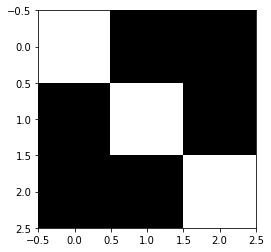

In [ ]:
filter1 = np.zeros((3,3))
np.fill_diagonal(filter1, np.array([1, 1, 1]))
plt.imshow(filter1, cmap = 'gray') 
plt.show()

# Filtro de detección de bordes

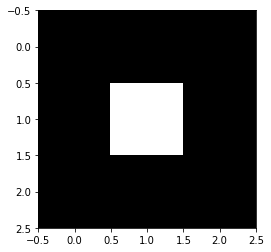

In [ ]:
kernel_2 = np.array([ [-1,-1,-1], [-1,8,-1], [-1,-1,-1]   ])
plt.imshow(kernel_2, cmap='gray')
plt.show()

Text(0.5, 0, 'Convolución discreta')

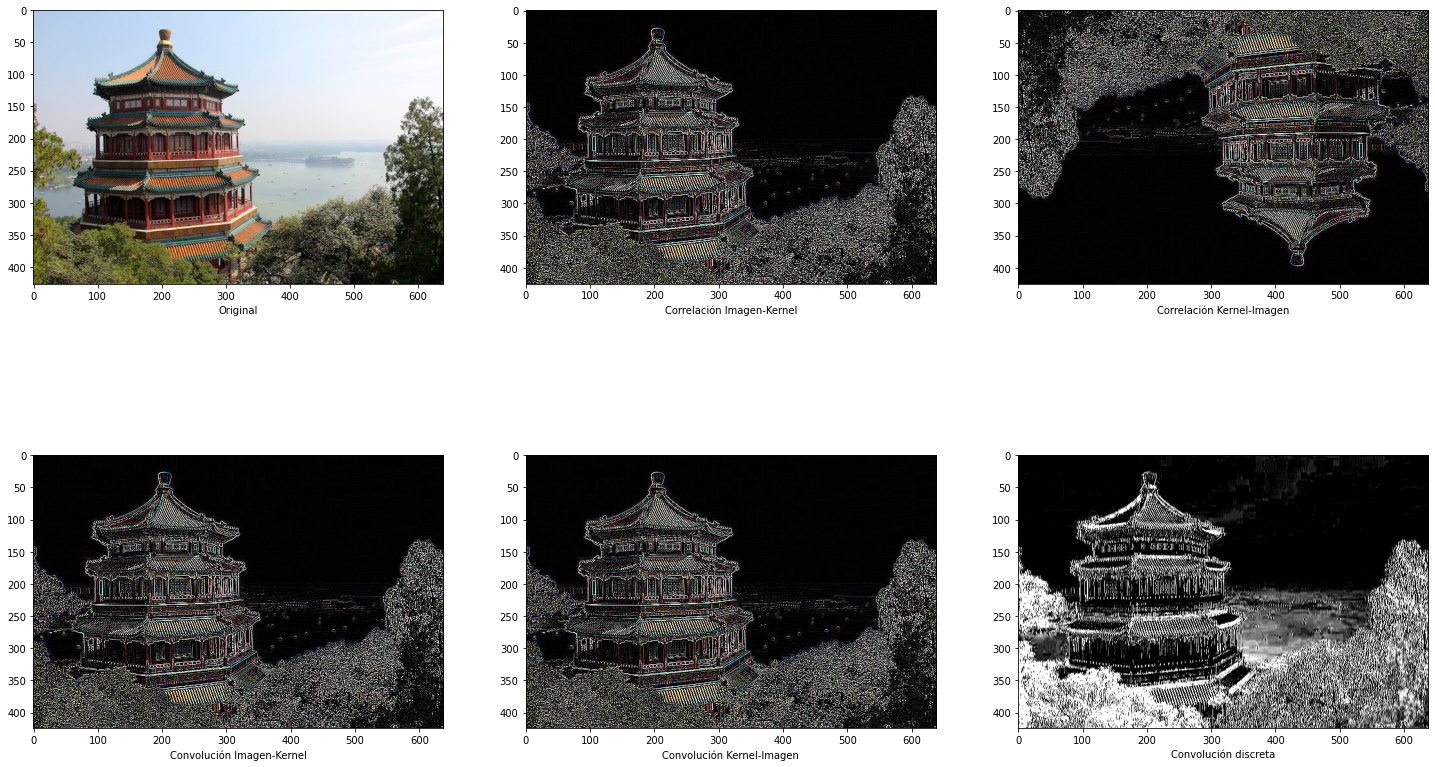

In [ ]:
a = conv2d(china,kernel_2,0,stride=1)

#Correlación
#Imagen-Kernel
corr2_1 = RGB_corr(china,kernel_2)


#Kernel-Imagen
corr2_2 = RGB_corr_inv(china, kernel_2)

#Convolución
#Imgen-Kernel
conv2_1 = RGB_conv(china,kernel_2)
#Kernel-Imagen
conv2_2 = RGB_conv_inv(china,kernel_2)

fig, axs = plt.subplots(2, 3, figsize=(25, 15))
axs[0,0].imshow(china)
axs[0,0].set_xlabel('Original')

axs[0,1].imshow(corr2_1,cmap='gray')
axs[0,1].set_xlabel('Correlación Imagen-Kernel')

axs[0,2].imshow(corr2_2)
axs[0,2].set_xlabel('Correlación Kernel-Imagen')

axs[1,0].imshow(conv2_1)
axs[1,0].set_xlabel('Convolución Imagen-Kernel')

axs[1,1].imshow(conv2_2)
axs[1,1].set_xlabel('Convolución Kernel-Imagen')

axs[1,2].imshow(a)
axs[1,2].set_xlabel('Convolución discreta')